# **`Data Preparation`**
___

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import phik
import math
import datetime

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)

### **`Background data`**

Data meanings:

- `VendorID`:   A code indicating the LPEP provider that provided
                the record.
                1 = Creative Mobile Technologies, LLC.
                2 = VeriFone Inc.
- `lpep_pickup_datetime`: The date and time when the meter was engaged.
- `lpep_dropoff_datetime`: The date and time when the meter was disengaged.
- `Passenger_count`:    The number of passengers in the vehicle.
                        This is a driver-entered value.
- `Trip_distance`: The elapsed trip distance in miles was reported by the taximeter.
- `PULocationID`: TLC Taxi Zone in which the taximeter was engaged.
- `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged.
- `RateCodeID`: The final rate code is in effect at the end of the trip.
                1 = Standard rate
                2 =JFK
                3 =Newark
                4 =Nassau or Westchester
                5 =Negotiated fare
                6 =Group ride
- `Store_and_fwd_flag`: This flag indicates whether the trip record was held
                        in the vehicle memory before sending to the vendor,
                        aka “store and forward,” because the vehicle did
                        not have a connection to the server.
                        Y = store and forward trip
                        N = not a store and forward trip
- `Payment_type`:   A numeric code signifying how the passenger paid for the trip. 
                    1 = Credit card
                    2 = Cash
                    3 = No charge
                    4 = Dispute
                    5 = Unknown
                    6 = Voided trip
- `Fare_amount`:The time-and-distance fare is calculated by the meter. 
                Extra Miscellaneous extras and surcharges.
                Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- `MTA_tax`:$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- `Improvement_surcharge`:  $0.30 improvement surcharge assessed on hailed trips at the flag drop. 
                            The improvement surcharge began being levied in 2015.
- `Tip_amount`:This field is automatically populated for credit card tips. Cash tips are not included.
- `Tolls_amount`:The total amount of all tolls paid in the trip.
- `Total_amount`:The total amount charged to passengers. Does not include cash tips.
- `Trip_type`:  A code indicating whether the trip was a street hail
                or a dispatch that is automatically assigned based
                on the metered rate in use but can be altered by the
                driver.
                1 = Street-hail
                2 = Dispatch

### `Load Dataset`

In [73]:
df=pd.read_csv(r'H:\Capstone2\data\raw\NYC TLC Trip Record.csv')
df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00


### `Menambah Data`
- Informasi dan data tambahan Taksi NYC dapat ditemukan di tautan di bawah ini, di sini saya menggunakan data label Green Taxi Tahun 2023 Bulan Januari. Tautan: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml.
- Untuk mendapat keterangan Pick Up dan Drop Off ID diperluka data tambahan. Data tambahan dapat di download https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

In [74]:
PULocationID = pd.read_csv(r'H:\Capst2\PUzone.csv')

### `Merge Data`

In [75]:
df = pd.merge(df,PULocationID, on = 'PULocationID')
df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,N,1.0,166,244,1.0,2.48,16.3,1.0,0.5,3.76,0.0,NaN,1.0,22.56,1.0,1.0,0.00,Manhattan,Morningside Heights,Boro Zone
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,N,1.0,166,250,5.0,9.01,37.3,1.0,0.5,0.00,0.0,NaN,1.0,39.80,2.0,1.0,0.00,Manhattan,Morningside Heights,Boro Zone


## `Data Understanding And Cleaning`

In [76]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

### `Missing Value`

In [77]:
print(f'Jumlah baris dan kolom: {df.shape}')
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if (df[col].dtype == int or df[col].dtype == float) and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (68211, 23)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,VendorID,int64,0.000000,False,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000000,False,66575,"[2023-01-01 00:26:10, 2023-01-01 00:01:31, 202..."
2,lpep_dropoff_datetime,object,0.000000,False,66519,"[2023-01-01 00:37:11, 2023-01-01 00:16:02, 202..."
3,store_and_fwd_flag,object,6.339154,False,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339154,False,6,"[1.0, 2.0, 3.0, 5.0, nan, 4.0, 99.0]"
5,PULocationID,int64,0.000000,False,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000000,False,249,"[143, 244, 250, 166, 229, 42, 41, 243, 78, 142..."
7,passenger_count,float64,6.339154,False,10,"[1.0, 5.0, 2.0, 3.0, 4.0, 6.0, 0.0, nan, 7.0, ..."
8,trip_distance,float64,0.000000,False,1870,"[2.58, 2.48, 9.01, 0.6, 5.13, 1.52, 1.18, 3.79..."
9,fare_amount,float64,0.000000,True,2553,"[14.9, 16.3, 37.3, 4.0, 25.4, 11.4, 9.3, 18.4,..."


<Axes: >

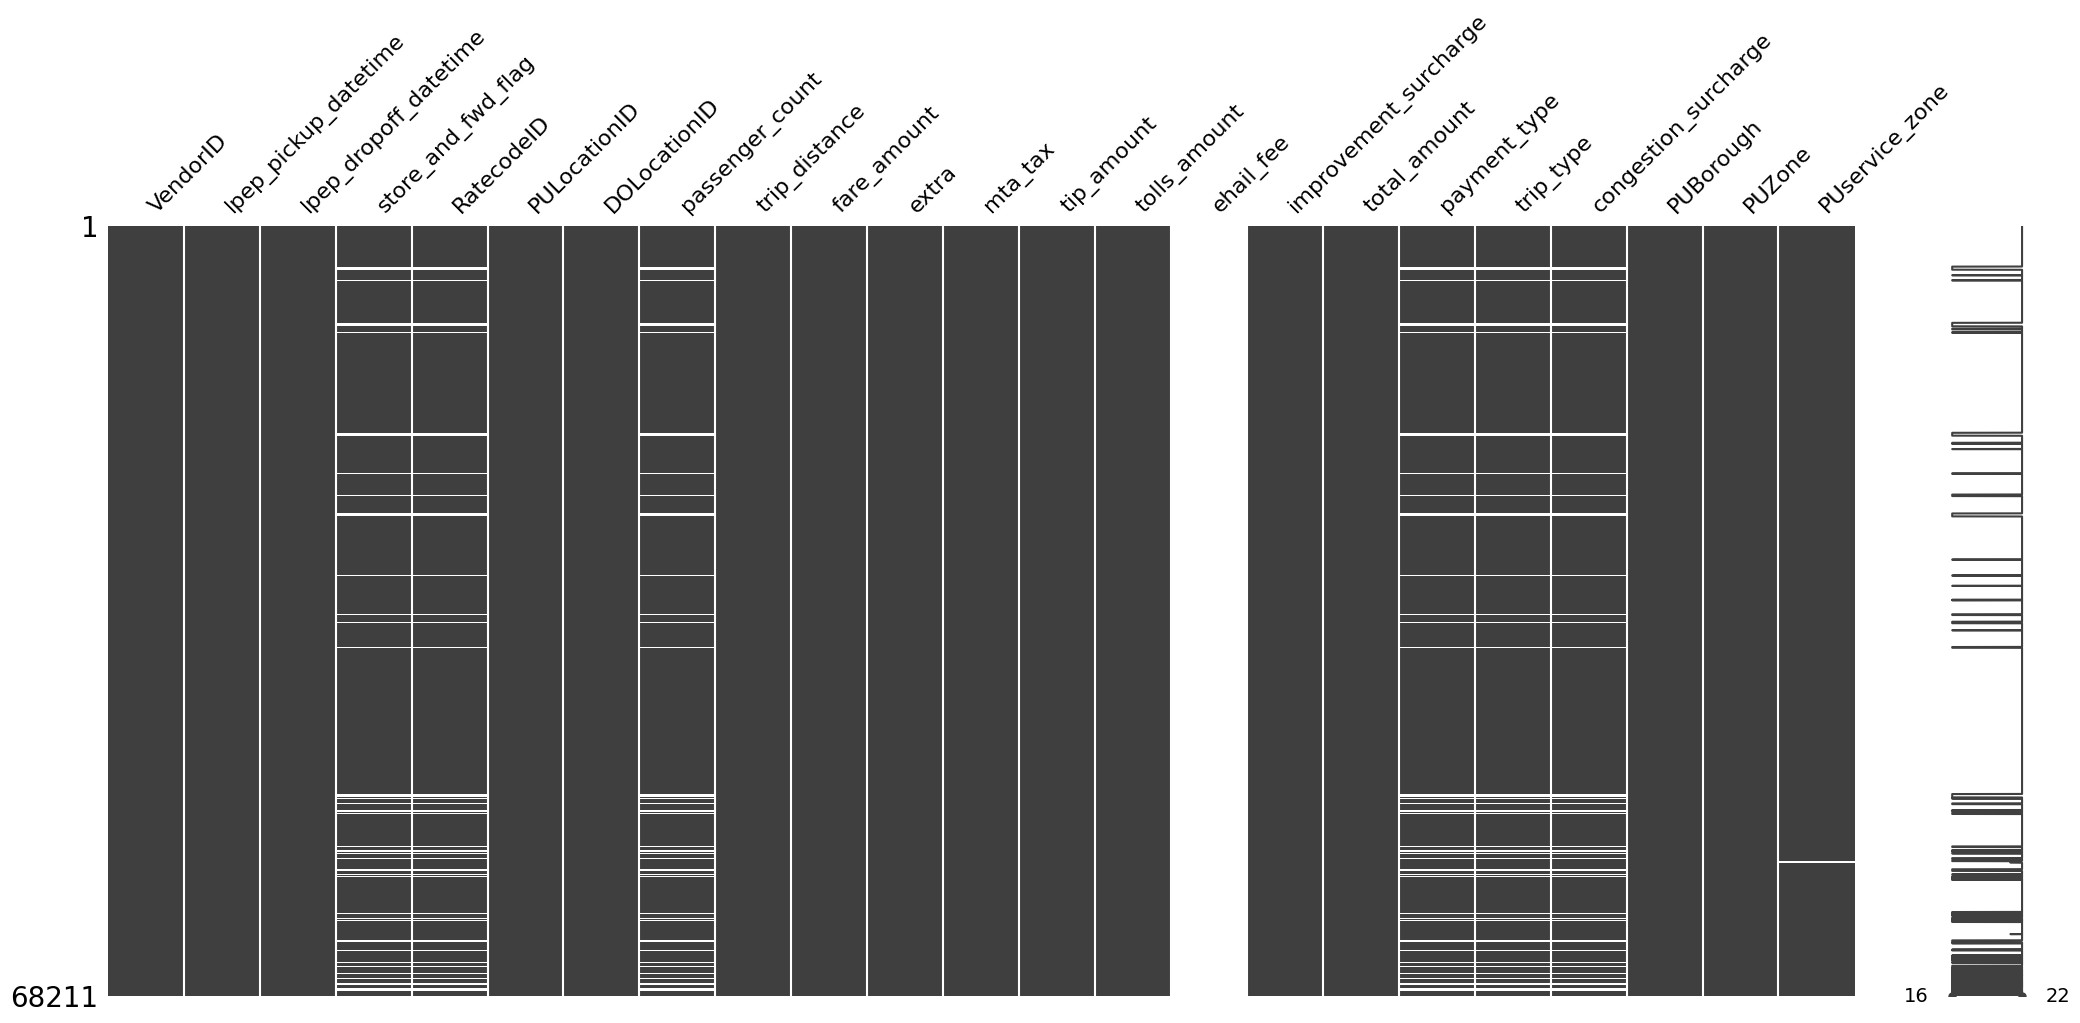

In [78]:
msn.matrix(df)

### `Merubah Tipe Data`

In [80]:
df["lpep_pickup_datetime"] = df["lpep_pickup_datetime"].astype('datetime64[s]')
df["lpep_dropoff_datetime"] = df["lpep_dropoff_datetime"].astype('datetime64[s]')

### `Mengganti nama columns`

In [81]:
df = df.rename(
    columns={
        'lpep_pickup_datetime': 'pickup_datetime', 
        'lpep_dropoff_datetime': 'dropoff_datetime'
    }
)
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PUBorough',
       'PUZone', 'PUservice_zone'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype        
---  ------                 --------------  -----        
 0   VendorID               68211 non-null  int64        
 1   pickup_datetime        68211 non-null  datetime64[s]
 2   dropoff_datetime       68211 non-null  datetime64[s]
 3   store_and_fwd_flag     63887 non-null  object       
 4   RatecodeID             63887 non-null  float64      
 5   PULocationID           68211 non-null  int64        
 6   DOLocationID           68211 non-null  int64        
 7   passenger_count        63887 non-null  float64      
 8   trip_distance          68211 non-null  float64      
 9   fare_amount            68211 non-null  float64      
 10  extra                  68211 non-null  float64      
 11  mta_tax                68211 non-null  float64      
 12  tip_amount             68211 non-null  float64      
 13  tolls_amount    

### `Menambahkan Columns Durasi Perjalanan`

In [83]:
df = df.assign(Durasi_perjalanan = lambda x: x.dropoff_datetime - x.pickup_datetime	)
df.head(3)

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,Durasi_perjalanan
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,0 days 00:11:01
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,N,1.0,166,244,1.0,2.48,16.3,1.0,0.5,3.76,0.0,NaN,1.0,22.56,1.0,1.0,0.00,Manhattan,Morningside Heights,Boro Zone,0 days 00:14:31
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,N,1.0,166,250,5.0,9.01,37.3,1.0,0.5,0.00,0.0,NaN,1.0,39.80,2.0,1.0,0.00,Manhattan,Morningside Heights,Boro Zone,0 days 00:20:26


In [137]:
df['time_in_seconds'] = pd.to_timedelta(df['Durasi_perjalanan']).dt.total_seconds()
df.head(3)

,VendorID,pickup_datetime,dropoff_datetime,pickup_day,pickup_hour,Ket_Waktu,Durasi_perjalanan,time_in_seconds,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,payment_type,total_amount,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,minggu,0,Tengah Malam,0 days 00:11:01,661.0,1,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,1.0,24.18,1.0,2.75,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,minggu,0,Tengah Malam,0 days 00:14:31,871.0,1,166,244,1.0,2.48,16.3,1.0,0.5,3.76,0.0,1.0,1.0,22.56,1.0,0.00,Manhattan,Morningside Heights,Boro Zone
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,minggu,0,Tengah Malam,0 days 00:20:26,1226.0,1,166,250,5.0,9.01,37.3,1.0,0.5,0.00,0.0,1.0,2.0,39.80,1.0,0.00,Manhattan,Morningside Heights,Boro Zone


## `Drop Columns`

### `Columns Ehailing`

- Columns Ehailing merupakan columns ongkos aplikasi untuk kendaraan pribadi yang digunakan untuk transportasi umum.
  Berdasarkan penjelasan diatas, saya menyimpulkan bahwa kendaraan yang digunakan adalah kendaraan milik perusahaan taxi. Sehingga Columns Ehaling fee tidak diperlukan untuk analisis data 

### `Columns store_and_fwd_flag`
- Columns ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. Columns
  ini tidak diperlukan dalam analisis data

In [85]:
df.drop(['ehail_fee'], axis=1, inplace= True)
df.drop(['store_and_fwd_flag'], axis=1, inplace= True)

### `Menampilkan statistik deskriptif untuk data numerikal dan kategorikal` 

In [86]:
display(df.describe(), df.describe(include='object'))

,VendorID,pickup_datetime,dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Durasi_perjalanan,time_in_seconds
count,68211.000000,68211,68211,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000,68211,68211.000000
mean,1.863028,2023-01-16 20:10:55,2023-01-16 20:29:01,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748,0 days 00:18:05,1085.836243
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000,0 days 00:00:00,0.000000
25%,2.000000,2023-01-09 11:59:47,2023-01-09 12:16:37,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000,0 days 00:07:13,433.000000
50%,2.000000,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000,0 days 00:11:24,684.000000
75%,2.000000,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000,0 days 00:17:29,1049.000000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,0 days 23:59:53,86393.000000
std,0.343820,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836,0 days 01:14:55,4495.537874


,PUBorough,PUZone,PUservice_zone
count,68211,68145,68010
unique,7,224,4
top,Manhattan,East Harlem North,Boro Zone
freq,39436,13257,64013


## `Insight`
- Terdapat RatecodeID 99 yag tidak ada deskripsiya di pdf
- Meurut referensi mta_tax merupaka kelipatan 0.5 tapi didata terdapat 2.75 yang bukan kelipatan dari 0.5
- congestion_surcharge adalah tarif tambahan jika terjadi kemacetan senilai 2.75 sedangkan didata terdapat 2.5
- Terdapat data perjalanan diluar periode data. dataset ini merupaka dataset periode jauari2023
- Terdapat negative value 

In [87]:
df.query(" RatecodeID == 99 ")

,VendorID,pickup_datetime,dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,Durasi_perjalanan,time_in_seconds
61145,1,2023-01-08 11:36:41,2023-01-08 12:14:59,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0,Brooklyn,Crown Heights North,Boro Zone,0 days 00:38:18,2298.0
62727,1,2023-01-23 13:45:11,2023-01-23 23:36:42,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0,Manhattan,Washington Heights South,Boro Zone,0 days 09:51:31,35491.0
64714,1,2023-01-05 20:33:45,2023-01-05 22:46:41,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0,Brooklyn,Bay Ridge,Boro Zone,0 days 02:12:56,7976.0
65830,1,2023-01-19 17:16:59,2023-01-19 22:29:53,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0,Unknown,NaN,NaN,0 days 05:12:54,18774.0
65899,1,2023-01-01 19:44:13,2023-01-01 19:58:30,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Boro Zone,0 days 00:14:17,857.0
65925,1,2023-01-15 17:52:52,2023-01-15 22:11:55,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Boro Zone,0 days 04:19:03,15543.0
65933,1,2023-01-21 20:29:58,2023-01-22 02:59:25,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Boro Zone,0 days 06:29:27,23367.0
66925,1,2023-01-02 16:39:05,2023-01-02 17:31:42,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0,Queens,East Flushing,Boro Zone,0 days 00:52:37,3157.0
67853,1,2023-01-15 13:51:42,2023-01-15 14:37:38,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0,Brooklyn,Gravesend,Boro Zone,0 days 00:45:56,2756.0
68184,1,2023-01-19 01:07:59,2023-01-19 01:17:19,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Manhattan,Flatiron,Yellow Zone,0 days 00:09:20,560.0


### `Replace Congestion Surcharge`
Congestion surcharge yang 2.5 dirubah ke 2.75

In [88]:
df.congestion_surcharge.replace({2.5:2.75}, inplace=True)

### `Replace Congestion Surcharge` 
dilihat dari waktu pick up dan drop off maka row yang memiliki mta tax 2.75 dirubah menjadi 0

In [89]:
df.mta_tax.value_counts()

mta_tax
 0.50    53177
 1.50     9065
 0.00     5778
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

In [90]:
df.query("mta_tax == 2.75")

,VendorID,pickup_datetime,dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,Durasi_perjalanan,time_in_seconds
21776,1,2023-01-29 19:18:43,2023-01-29 19:19:02,1.0,97,97,1.0,0.0,0.0,0.0,2.75,0.0,0.0,0.0,2.75,1.0,1.0,0.0,Brooklyn,Fort Greene,Boro Zone,0 days 00:00:19,19.0


In [91]:
df.mta_tax.replace({2.75:0}, inplace=True)
df.mta_tax.value_counts()

mta_tax
 0.5    53177
 1.5     9065
 0.0     5779
-0.5      165
 1.0       25
Name: count, dtype: int64

## `Outlier`
melihat outlier dengan mengesampingkan nan values

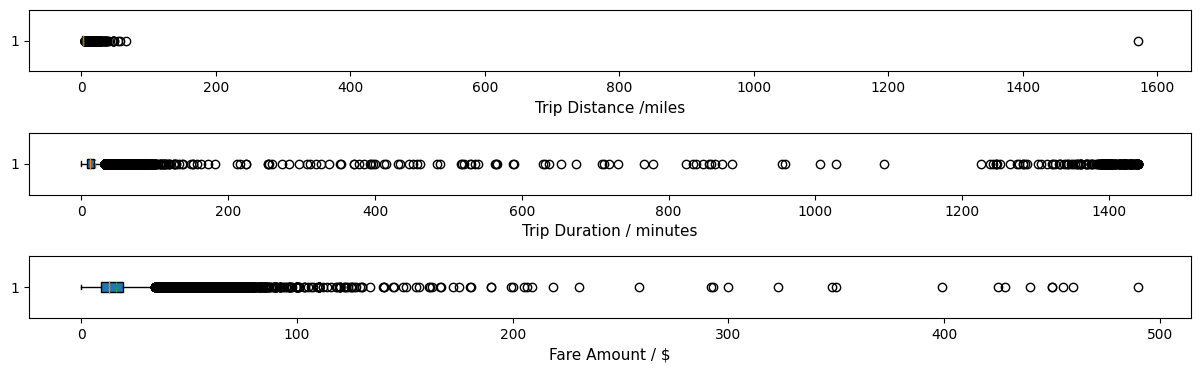

In [92]:
trip_distance = df.dropna().trip_distance
trip_duration = df.dropna().time_in_seconds.apply(lambda x: x/60)
fare_amount = df.dropna().fare_amount.apply(abs)

fig, axes = plt.subplots(3,figsize=(15, 4))
axes[0].boxplot(trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(trip_duration, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[2].boxplot(fare_amount, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Trip Distance /miles", fontsize=11)
axes[1].set_xlabel("Trip Duration / minutes", fontsize=11)
axes[2].set_xlabel("Fare Amount / $", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

### `Membatasi rentang data` 
- jarak terjauh yang dapat ditempuh oleh supir taxi jika mengantar penumpang dari pusat kota ke titik paling luar New York adalah 27 mil jika supir kembali ke titik pusat kota New York maka jarak yang ditempuh adalah 54 mil . dengan asumsi supir memutar agak jauh maka data dibatasi menjadi 70 mil 
- Sesuai dengan ketentuan NYC TLC https://www.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf 
  durasi maksimal satu perjalanan taksi adalah 12 jam 

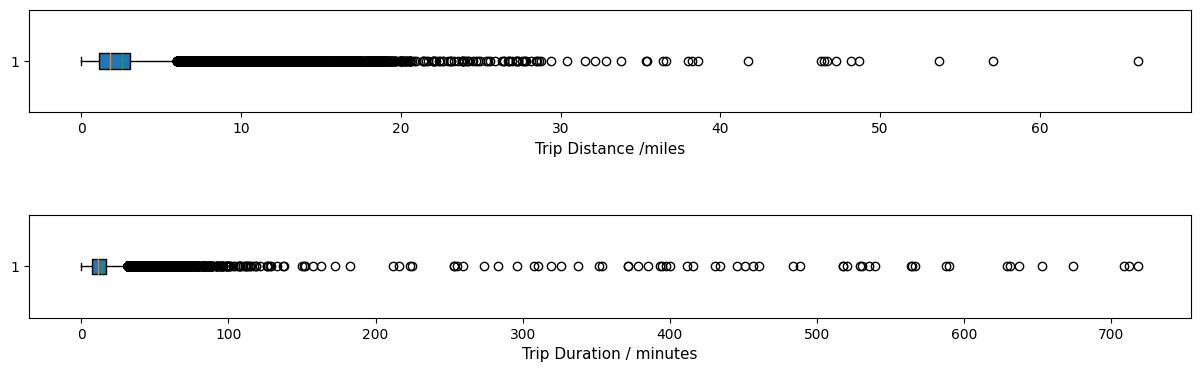

In [93]:
# exclude nan values
trip_distance = df[df.trip_distance <= 70].dropna().trip_distance
trip_duration = df[df.time_in_seconds <= 12*3600].dropna().time_in_seconds.apply(lambda x: x/60)

fig, axes = plt.subplots(2,figsize=(15, 4))
axes[0].boxplot(trip_distance, patch_artist=True, meanline=True, showmeans=True, vert=False)
axes[1].boxplot(trip_duration, patch_artist=True, meanline=True, showmeans=True, vert=False)

axes[0].set_xlabel("Trip Distance /miles", fontsize=11)
axes[1].set_xlabel("Trip Duration / minutes", fontsize=11)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=1)
plt.show()

## `Handling Data`

### `Date Time`
karna kita hanya menggunakan data januari 2023 maka selain itu kita singkirkan

In [94]:
df = df[(df.pickup_datetime.apply(lambda x: x.year) == 2023) & (df.pickup_datetime.apply(lambda x: x.month) == 1)]

### `Duplicated data`
Untuk mengecek duplicated data pegeceka dilakukan pada kolom Pickup drop off time dan pickup dan drop off location

In [95]:
df[df.duplicated(subset=['pickup_datetime', 'dropoff_datetime','PULocationID','DOLocationID'], keep=False)]

,VendorID,pickup_datetime,dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,Durasi_perjalanan,time_in_seconds
150,2,2023-01-03 11:30:37,2023-01-03 11:32:23,1.0,166,166,2.0,0.16,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,Manhattan,Morningside Heights,Boro Zone,0 days 00:01:46,106.0
151,2,2023-01-03 11:30:37,2023-01-03 11:32:23,1.0,166,166,2.0,0.16,3.7,0.0,0.5,0.0,0.0,1.0,5.2,3.0,1.0,0.0,Manhattan,Morningside Heights,Boro Zone,0 days 00:01:46,106.0
402,2,2023-01-05 15:01:39,2023-01-05 15:02:16,1.0,166,166,1.0,0.13,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0,Manhattan,Morningside Heights,Boro Zone,0 days 00:00:37,37.0
403,2,2023-01-05 15:01:39,2023-01-05 15:02:16,1.0,166,166,1.0,0.13,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4.0,1.0,0.0,Manhattan,Morningside Heights,Boro Zone,0 days 00:00:37,37.0
1744,2,2023-01-18 14:41:30,2023-01-18 14:42:00,1.0,166,166,1.0,0.01,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,Morningside Heights,Boro Zone,0 days 00:00:30,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67707,2,2023-01-16 03:39:38,2023-01-16 03:54:12,1.0,235,78,1.0,2.34,0.0,0.0,0.5,0.0,0.0,1.0,1.5,2.0,1.0,0.0,Bronx,University Heights/Morris Heights,Boro Zone,0 days 00:14:34,874.0
68108,2,2023-01-29 16:36:54,2023-01-29 16:37:00,1.0,248,248,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Bronx,West Farms/Bronx River,Boro Zone,0 days 00:00:06,6.0
68109,2,2023-01-29 16:36:54,2023-01-29 16:37:00,1.0,248,248,1.0,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0,Bronx,West Farms/Bronx River,Boro Zone,0 days 00:00:06,6.0
68110,2,2023-01-29 16:39:50,2023-01-29 16:40:01,1.0,248,248,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Bronx,West Farms/Bronx River,Boro Zone,0 days 00:00:11,11.0


Terdapat 174 duplikasi data berdasarkan 'Pickup_datetime', 'Dropoff_datetime','PULocationID','DOLocationID'

In [96]:
df.drop_duplicates(subset=['pickup_datetime', 'dropoff_datetime','PULocationID','DOLocationID'], keep='last', inplace=True)

### `Handling Missing Value`

In [97]:
df.isna().sum()

VendorID                    0
pickup_datetime             0
dropoff_datetime            0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
PUBorough                   0
PUZone                     66
PUservice_zone            199
Durasi_perjalanan           0
time_in_seconds             0
dtype: int64

## `RatecodeID`

In [98]:
df.RatecodeID.value_counts()

RatecodeID
1.0     61937
5.0      1519
2.0       156
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

DIlihat dari file pdf tidak terdapat RatecodeID 99 dikarenakan tidak adanya deskripsi data dan jumlah data yg memiliki ratecode 99 berjumlah 10 data. maka saya memilih untuk drop row yg memiliki ratecode 99

In [99]:
df = df[df.RatecodeID != 99]
df.RatecodeID.value_counts()

RatecodeID
1.0    61937
5.0     1519
2.0      156
4.0       57
3.0       30
Name: count, dtype: int64

## `Mengisi NaN Values pada RatecodeID`
berdasarkan https://www.nyc.gov/site/tlc/passengers/taxi-fare.page 
- Trip dari JFK dan Trip ke JFK diisi RatecodeID 2
- Trip yang memiliki DOLocationID ke EWR diisi RatecodeID 3

In [100]:
df.loc[(df['DOLocationID'] == 132) & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['PULocationID'] == 132) & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['DOLocationID'] == 1) & (df['RatecodeID'].isna()), 'RatecodeID'] = 3

Sisa NaN Values lainya diisi dengan RatecodeID 1 dengan asumsi mereka membayar dengan tarif normal

In [101]:
df['RatecodeID'].fillna(1, inplace=True)

In [102]:
df.isna().sum()

VendorID                    0
pickup_datetime             0
dropoff_datetime            0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4324
congestion_surcharge     4324
PUBorough                   0
PUZone                     65
PUservice_zone            198
Durasi_perjalanan           0
time_in_seconds             0
dtype: int64

## `Mengisi NaN Values pada passenger_count`
Untuk Missing values pada Passennger Count diisi dengan 1. dengan asumsi jumlah minimum penumpang 1 Data perjalanan tidak akan ada jika tidak ada penumpang. dan data yang passenger count nya 0 kita rubah menjadi 1

In [103]:
df.passenger_count.replace({0:1}, inplace=True)
df['passenger_count'].fillna(1, inplace=True)

In [104]:
df.passenger_count.value_counts()

passenger_count
1.0    58821
2.0     5060
5.0     1768
6.0     1053
3.0      951
4.0      362
7.0        4
8.0        2
9.0        2
Name: count, dtype: int64

In [105]:
df.isna().sum()

VendorID                    0
pickup_datetime             0
dropoff_datetime            0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4324
congestion_surcharge     4324
PUBorough                   0
PUZone                     65
PUservice_zone            198
Durasi_perjalanan           0
time_in_seconds             0
dtype: int64

## `Mengisi NaN Values pada Payment Type`

- untuk yang memiliki trip distance 0 dan total amount 0 maka diisi Paymet Type = 6 dengan asumsi perjalanan dibatalkan
- dan sisanya diisi dengan Payment Type = 5. dikarenakan pada pdf terdapat opsi 5 yaitu UNKNOWN jenis pembbayaran tidak diketahui

In [106]:
df.loc[(df['trip_distance'] == 0) & (df['total_amount'] == 0) & (df['payment_type'].isna()), 'payment_type'] = 6

In [107]:
df['payment_type'].fillna(5, inplace=True)

In [108]:
df.loc[(df['trip_distance'] == 0) & (df['total_amount'] == 0), 'payment_type'] = 6

In [109]:
df.payment_type.value_counts()

payment_type
1.0    40633
2.0    22610
5.0     4326
3.0      331
4.0       63
6.0       60
Name: count, dtype: int64

In [110]:
df.isna().sum()

VendorID                    0
pickup_datetime             0
dropoff_datetime            0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                4324
congestion_surcharge     4324
PUBorough                   0
PUZone                     65
PUservice_zone            198
Durasi_perjalanan           0
time_in_seconds             0
dtype: int64

## `Megisi NaN Values pada Trip Type`
dikarenakan Columns ini cukup penting untuk membedakan jenis panggilan taksi yg dilakukan secara langsung dijalan/ street-hail atau melalui pangkalan/dispatch. maka missing value pada Trip type kita isi dengan kategori baru yaitu kategori 3 = others

In [111]:
df['trip_type'].fillna(3, inplace=True)

In [112]:
df.isna().sum()

VendorID                    0
pickup_datetime             0
dropoff_datetime            0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge     4324
PUBorough                   0
PUZone                     65
PUservice_zone            198
Durasi_perjalanan           0
time_in_seconds             0
dtype: int64

## `Mengisi NaN Values pada columns Congestion Surcharge`

Text(0.5, 1.0, 'correlation $\\phi_K$')

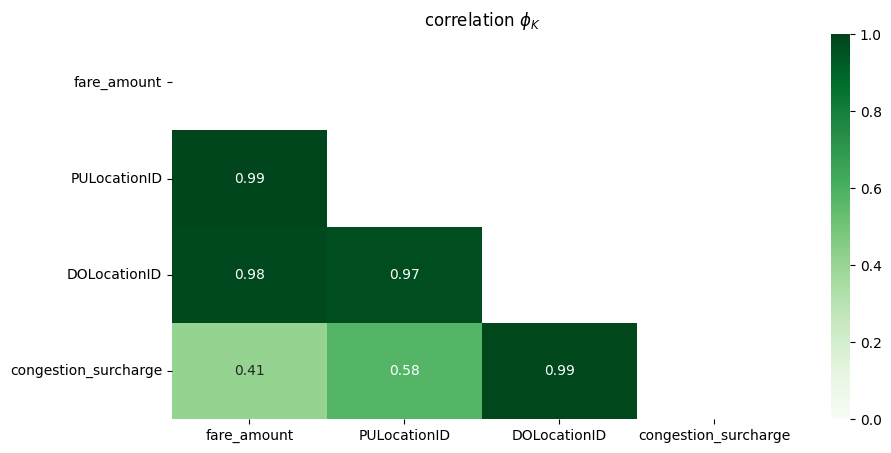

In [113]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)

cols = ['fare_amount', 'PULocationID','DOLocationID', 'congestion_surcharge']

corr = df[cols].phik_matrix(interval_cols='fare_amount')
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Greens", ax=ax)
ax.set_title(r'correlation $\phi_K$')

Korelasi phik tertinggi adalah antara congestion surcharge dan DOLocationID congestion surcharge akan diimputasi menggunakan peluang bersyarat terhadap DOLocationID.

### `Membuat cross tabulasi DOLocationID dan caongestion surcharge`

In [114]:
congestion_ct = pd.crosstab(df.DOLocationID, df.congestion_surcharge, margins=True)
congestion_ct.sort_values(by=2.75, ascending=False)

congestion_surcharge,0.0,2.75,All
DOLocationID,,,
All,46812,16887,63699
236,162,2491,2653
238,821,1417,2238
263,101,1410,1511
239,5,1398,1403
...,...,...,...
73,60,0,60
160,289,0,289
159,151,0,151


## `Menghitung Peluang`
P(congestion | DOLocationID) = P(congestion ∩ DOLocationID) / P(DOLocationID)

In [115]:
congestion = (congestion_ct.iloc[:-1,1] / congestion_ct.iloc[-1,-1]) / (congestion_ct.iloc[:-1,2] / congestion_ct.iloc[-1,-1])
congestion.name = 'congestion'
congestion

DOLocationID
1      0.095238
3      0.000000
4      0.967213
7      0.008174
8      0.000000
         ...   
261    0.894737
262    0.994145
263    0.933157
264    0.021531
265    0.004464
Name: congestion, Length: 248, dtype: float64

Congestion surcharge akan dianggap ada ketika peluang lebih dari 0.5

In [116]:
df= df.merge(congestion, how='left', left_on='DOLocationID', right_index=True)

# mengubah float nan menjadi np.nan
df.congestion = df.congestion.apply(lambda x: np.nan if math.isnan(x) else x)

# peluang > 0.5 dinyatakan macet (atau congestion surcharge ada nilainya, $2.75)
df.congestion_surcharge = np.where(df.congestion.isna().values, np.nan, np.where(df.congestion > 0.5, 2.75, 0))

# drop kolom congestion
df.drop(columns='congestion', inplace=True)

In [117]:
df.isna().sum()

VendorID                   0
pickup_datetime            0
dropoff_datetime           0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
payment_type               0
trip_type                  0
congestion_surcharge       2
PUBorough                  0
PUZone                    65
PUservice_zone           198
Durasi_perjalanan          0
time_in_seconds            0
dtype: int64

In [118]:
df.query("congestion_surcharge.isna()")

,VendorID,pickup_datetime,dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,Durasi_perjalanan,time_in_seconds
65897,2,2023-01-28 20:20:00,2023-01-28 20:34:00,1.0,167,58,1.0,6.42,19.34,0.0,0.0,0.25,0.0,1.0,20.59,5.0,3.0,NaN,Bronx,Morrisania/Melrose,Boro Zone,0 days 00:14:00,840.0
67647,2,2023-01-17 13:58:00,2023-01-17 14:09:00,1.0,185,58,1.0,2.57,19.47,0.0,0.0,1.50,0.0,1.0,21.97,5.0,3.0,NaN,Bronx,Pelham Parkway,Boro Zone,0 days 00:11:00,660.0


Setelah melakukan imputasi masih terdapat 2 rows yang memiliki NaN Values maka akan diisi 0

In [119]:
df['congestion_surcharge'].fillna(0, inplace=True)

<Axes: >

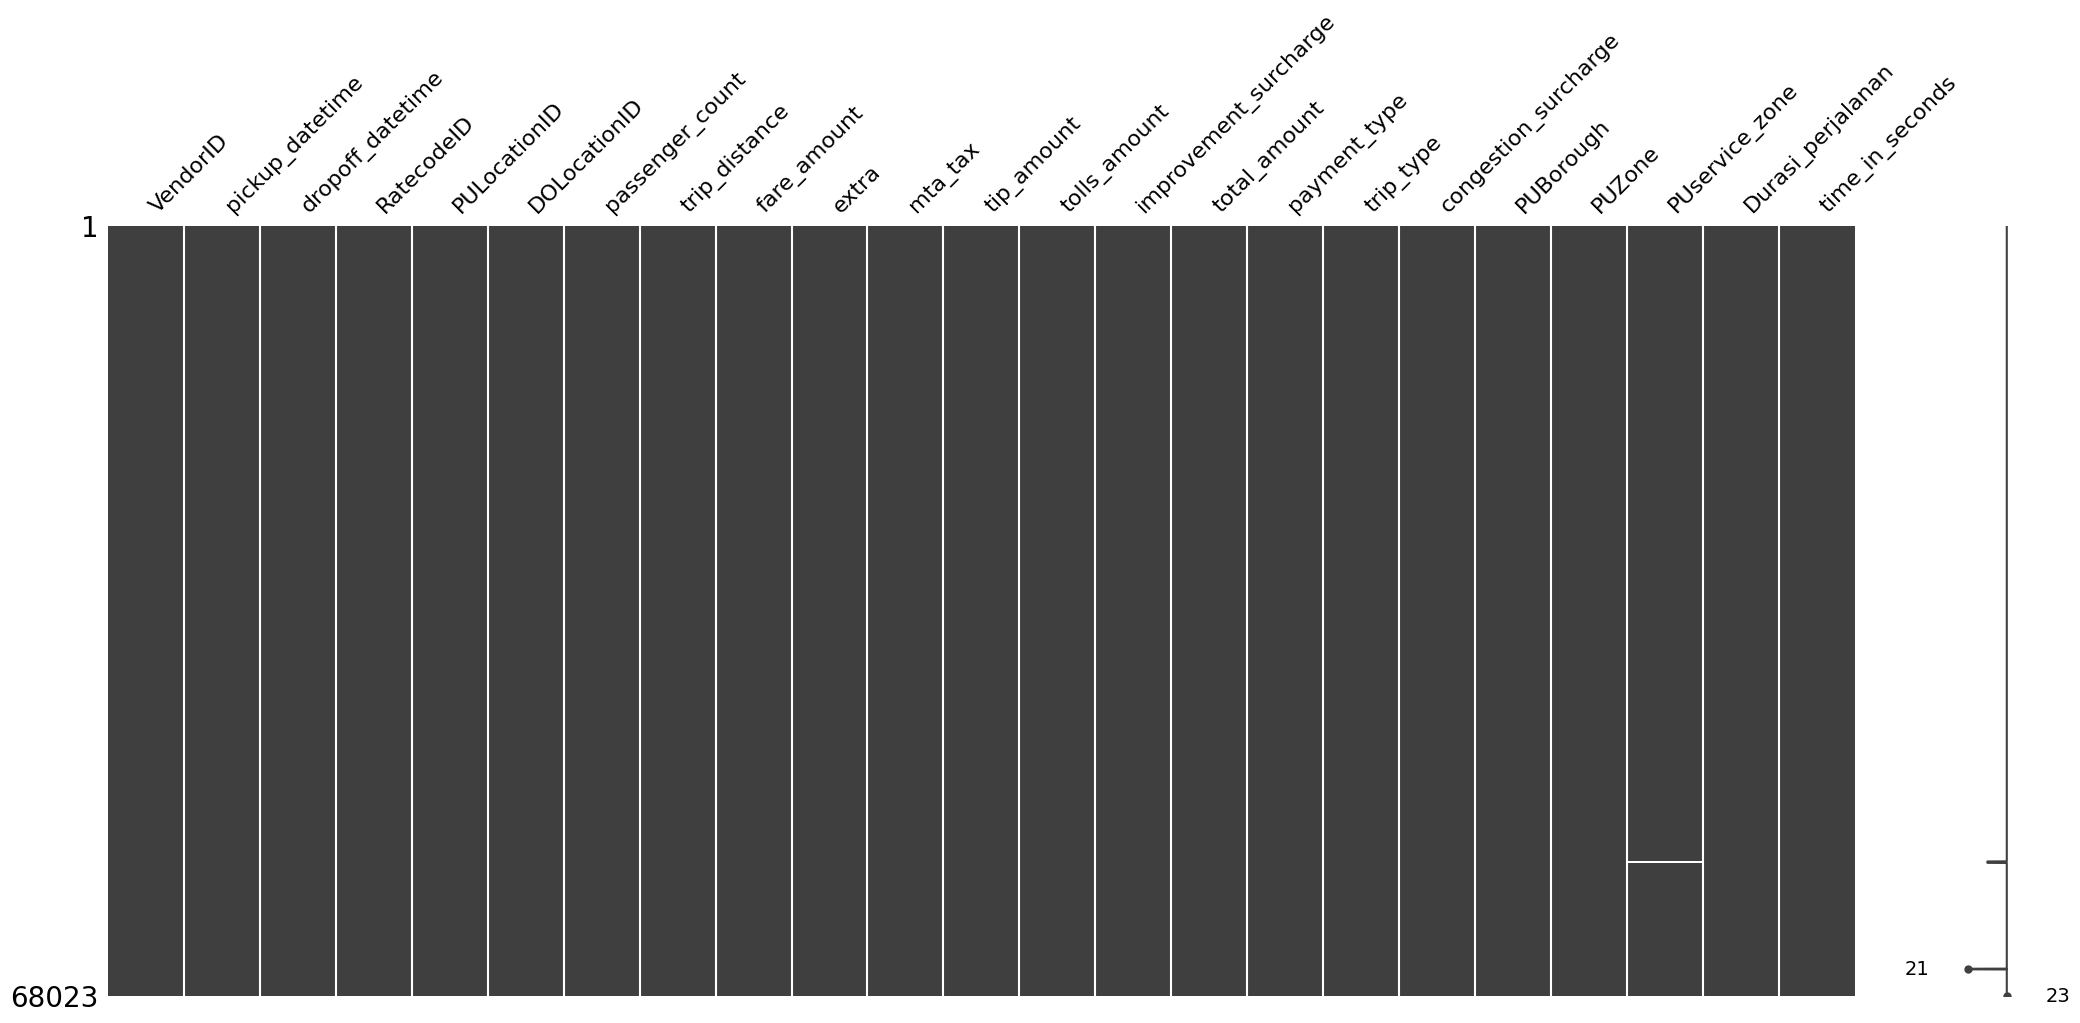

In [120]:
msn.matrix(df)

### `Pickup and Dropoff location Unknown`
PULocationID and DOLocationID = 264, 265 lokasinya tidak diketahui. row yang memiliki Pickup dan dropoff 264 dan 265 akan di drop

In [121]:
df = df[df.PULocationID != 264]
df = df[df.DOLocationID != 264]
df = df[df.PULocationID != 265]
df = df[df.DOLocationID != 265]

## `Handling Negative Values`

In [122]:
df[["fare_amount", "extra", "mta_tax", "tip_amount", "total_amount", "improvement_surcharge", "congestion_surcharge"]] = df[["fare_amount", "extra", "mta_tax", "tip_amount", "total_amount", "improvement_surcharge", "congestion_surcharge"]].abs()

# Update kolom "total_amount"

df.drop(columns="total_amount", inplace=True)
df.insert(15, "total_amount", df["fare_amount"] + df["extra"] + df["mta_tax"] + df["tip_amount"] + df["tolls_amount"] + df["improvement_surcharge"] + df["congestion_surcharge"])

## `Handling Outlier`

Sesuai dengan ketentuan NYC TLC https://www.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf durasi maksimal satu perjalanan taksi adalah 12 jam. maka untuk perjalanan yang lebih dari 12 jam dirunah menjadi batas maksimal 12 jam

In [123]:
df.loc[df['Durasi_perjalanan'] > datetime.timedelta(hours=12), 'Durasi_perjalanan'] = datetime.timedelta(hours=12)

untuk columns outlier Trip distance 
- jarak terjauh yang dapat ditempuh oleh supir taxi jika mengantar penumpang dari pusat kota ke titik paling luar New York adalah 27 mil jika supir kembali ke titik pusat kota New York maka jarak yang ditempuh adalah 54 mil . dengan asumsi supir memutar agak jauh maka data dibatasi menjadi 70 mil data yang memiliki distance diatas 70 mil akan didrop

In [124]:
df = df[df.trip_distance <= 70]

### `Menambahkan Columns Keterangan Waktu` 

In [125]:
df['Ket_Waktu'] = df['pickup_datetime'].dt.hour
def time_slots(x):
    if x in range(3,6):
        return 'Subuh'
    elif x in range(6,11):
        return 'Pagi'
    elif x in range(11,15):
        return 'Siang'
    elif x in range(15,18):
        return 'Sore'
    elif x in range(18,23):
        return 'Malam'
    else:
        return 'Tengah Malam'

df['Ket_Waktu'] = df['Ket_Waktu'].apply(time_slots)

### `Menambah Columns Ket Hari` 

In [126]:
df['pickup_day']=df['pickup_datetime'].dt.weekday
df["pickup_day"] = df["pickup_day"].astype('object')

df.pickup_day.replace({0:'senin'}, inplace=True)
df.pickup_day.replace({1:'selasa'}, inplace=True)
df.pickup_day.replace({2:'rabu'}, inplace=True)
df.pickup_day.replace({3:'kamis'}, inplace=True)
df.pickup_day.replace({4:'jumat'}, inplace=True)
df.pickup_day.replace({5:'sabtu'}, inplace=True)
df.pickup_day.replace({6:'minggu'}, inplace=True)

### `Menambah Columns Ket Jam`

In [127]:
df['pickup_hour'] = pd.DatetimeIndex(df['pickup_datetime']).hour
df["pickup_hour"] = df["pickup_hour"].astype('Int64')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67281 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67281 non-null  int64         
 1   pickup_datetime        67281 non-null  datetime64[s] 
 2   dropoff_datetime       67281 non-null  datetime64[s] 
 3   RatecodeID             67281 non-null  float64       
 4   PULocationID           67281 non-null  int64         
 5   DOLocationID           67281 non-null  object        
 6   passenger_count        67281 non-null  float64       
 7   trip_distance          67281 non-null  float64       
 8   fare_amount            67281 non-null  float64       
 9   extra                  67281 non-null  float64       
 10  mta_tax                67281 non-null  float64       
 11  tip_amount             67281 non-null  float64       
 12  tolls_amount           67281 non-null  float64       
 13  improv

### `Mengatur Ulang Urutan Columns`

In [129]:
df = df[['VendorID', 'pickup_datetime', 'dropoff_datetime','pickup_day','pickup_hour','Ket_Waktu','Durasi_perjalanan','time_in_seconds','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','payment_type','total_amount','trip_type','congestion_surcharge','PUBorough','PUZone','PUservice_zone']]

In [146]:
df["time_in_seconds"] = df["time_in_seconds"].astype('int64')
df["RatecodeID"] = df["RatecodeID"].astype('int64')
df["DOLocationID"] = df["DOLocationID"].astype('int64')
df["payment_type"] = df["payment_type"].astype('int64')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67281 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67281 non-null  int64         
 1   pickup_datetime        67281 non-null  datetime64[s] 
 2   dropoff_datetime       67281 non-null  datetime64[s] 
 3   pickup_day             67281 non-null  object        
 4   pickup_hour            67281 non-null  Int64         
 5   Ket_Waktu              67281 non-null  object        
 6   Durasi_perjalanan      67281 non-null  timedelta64[s]
 7   time_in_seconds        67281 non-null  int64         
 8   RatecodeID             67281 non-null  int64         
 9   PULocationID           67281 non-null  int64         
 10  DOLocationID           67281 non-null  int64         
 11  passenger_count        67281 non-null  float64       
 12  trip_distance          67281 non-null  float64       
 13  fare_a

In [148]:
df.to_excel(r'H:\Capstone2\data\processed\Clean NYC TLC.xlsx', index= False)
df.to_csv(r'H:\Capstone2\data\processed\Clean NYC TLC.csv', index= False)